# Segmentation of Indian Traffic

In [1]:
import math
from PIL import Image, ImageDraw
from PIL import ImagePath
import pandas as pd
import os
from os import path
from tqdm import tqdm
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib

https://drive.google.com/drive/folders/1bynkOIXCurhJ9_Y5Q14KWX5yDyCRkKfN

In [2]:
!wget --header="Host: doc-0s-2s-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_vv1fqgeeo4cf9do6d6gcs9gsb02gb299_nonce=kpecca3on6ags" --header="Connection: keep-alive" "https://doc-0s-2s-docs.googleusercontent.com/docs/securesc/dt71804nkbg8nft58305qeak10jc3f0k/0sk9f1f0q0l46hnd7p5tsb3sqfn5nc3j/1637032725000/00484516897554883881/15716323643841165579/1iQ93IWVdR6dZ6W7RahbLq166u-6ADelJ?e=download&authuser=0&nonce=kpecca3on6ags&user=15716323643841165579&hash=7fo155clnbi2n92vqievtocqs0ndennq" -c -O 'data.zip'
!unzip /content/data.zip

--2022-08-07 07:22:39--  https://doc-0s-2s-docs.googleusercontent.com/docs/securesc/dt71804nkbg8nft58305qeak10jc3f0k/0sk9f1f0q0l46hnd7p5tsb3sqfn5nc3j/1637032725000/00484516897554883881/15716323643841165579/1iQ93IWVdR6dZ6W7RahbLq166u-6ADelJ?e=download&authuser=0&nonce=kpecca3on6ags&user=15716323643841165579&hash=7fo155clnbi2n92vqievtocqs0ndennq
Resolving doc-0s-2s-docs.googleusercontent.com (doc-0s-2s-docs.googleusercontent.com)... 74.125.142.132, 2607:f8b0:400e:c08::84
Connecting to doc-0s-2s-docs.googleusercontent.com (doc-0s-2s-docs.googleusercontent.com)|74.125.142.132|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2022-08-07 07:22:39 ERROR 403: Forbidden.

Archive:  /content/data.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zi

In [ ]:
dir_path = '/content/data'
file_names = set()
for i in os.listdir(dir_path):
    file_names.add(i.split('.')[0])

In [ ]:
file_names

{'images', 'mask'}

In [ ]:
import pandas as pd
import re
data_df = pd.DataFrame()

dir_path = '/content/data/images'
image_names =list()
for i in os.listdir(dir_path):
  for j in os.listdir(str(dir_path)+'/'+str(i)):
    image_names.append(str(dir_path)+'/'+str(i)+'/'+str(j))
dir_path = '/content/data/mask'
json_names =list()
for i in os.listdir(dir_path):
  for j in os.listdir(str(dir_path)+'/'+str(i)):
    json_names.append(str(dir_path)+'/'+str(i)+'/'+str(j))

data_df['image']= sorted(image_names)
data_df['json'] = sorted(json_names)

In [ ]:
file_names

{'images', 'mask'}

In [ ]:
data_df.sample(3)

,image,json
3919,/content/data/images/421/0013764_leftImg8bit.jpg,/content/data/mask/421/0013764_gtFine_polygons...
2702,/content/data/images/355/frame4557_leftImg8bit...,/content/data/mask/355/frame4557_gtFine_polygo...
198,/content/data/images/213/frame20999_leftImg8bi...,/content/data/mask/213/frame20999_gtFine_polyg...


# Task 1: Preprocessing

## 1. Get all the file name and corresponding json files

In [ ]:
def return_file_names_df(root_dir):
    dir_path = '/content/data/images'
    image_names =list()
    for i in os.listdir(dir_path):
      for j in os.listdir(str(dir_path)+'/'+str(i)):
        dir_path =re.sub('/content/','',str(dir_path))
        image_names.append(str(dir_path)+'/'+str(i)+'/'+str(j))
    dir_path = '/content/data/mask'
    json_names =list()
    for i in os.listdir(dir_path):
      for j in os.listdir(str(dir_path)+'/'+str(i)):
        dir_path =re.sub('/content/','',str(dir_path))
        json_names.append(str(dir_path)+'/'+str(i)+'/'+str(j))
    
    return data_df

In [ ]:
data_df = return_file_names_df('/content/data')
data_df.head()

,image,json
0,/content/data/images/201/frame0029_leftImg8bit...,/content/data/mask/201/frame0029_gtFine_polygo...
1,/content/data/images/201/frame0299_leftImg8bit...,/content/data/mask/201/frame0299_gtFine_polygo...
2,/content/data/images/201/frame0779_leftImg8bit...,/content/data/mask/201/frame0779_gtFine_polygo...
3,/content/data/images/201/frame1019_leftImg8bit...,/content/data/mask/201/frame1019_gtFine_polygo...
4,/content/data/images/201/frame1469_leftImg8bit...,/content/data/mask/201/frame1469_gtFine_polygo...


> If you observe the dataframe, we can consider each row as single data point, where first feature is image and the second feature is corresponding json file

In [ ]:
def grader_1(data_df):
    for i in data_df.values:
        if not (path.isfile(i[0]) and path.isfile(i[1]) and i[0][12:i[0].find('_')]==i[1][10:i[1].find('_')]):
            return False
    return True

In [ ]:
grader_1(data_df)

False

In [ ]:
data_df.shape

(4008, 2)

## 2. Structure of sample Json file

<img src='https://i.imgur.com/EfR5KmI.png' width="200" height="100">

* Each File will have 3 attributes
    * imgHeight: which tells the height of the image
    * imgWidth: which tells the width of the image
    * objects: it is a list of objects, each object will have multiple attributes,
        * label: the type of the object
        * polygon: a list of two element lists, representing the coordinates of the polygon

#### Compute the unique labels

Let's see how many unique objects are there in the json file.
to see how to get the object from the json file please check <a href='https://www.geeksforgeeks.org/read-json-file-using-python/'>this blog </a>

In [ ]:
len(data_df)

4008

In [ ]:
import json

Label = list()
for i in range(len(data_df)):
  f = open(data_df.iloc[i,1])
  data = json.load(f)
  for j in data['objects']:
    Label.append(j['label'])

In [ ]:
np.unique(Label)

array(['animal', 'autorickshaw', 'bicycle', 'billboard', 'bridge',
       'building', 'bus', 'car', 'caravan', 'curb', 'drivable fallback',
       'ego vehicle', 'fallback background', 'fence', 'ground',
       'guard rail', 'motorcycle', 'non-drivable fallback',
       'obs-str-bar-fallback', 'out of roi', 'parking', 'person', 'pole',
       'polegroup', 'rail track', 'rectification border', 'rider', 'road',
       'sidewalk', 'sky', 'traffic light', 'traffic sign', 'trailer',
       'train', 'truck', 'tunnel', 'unlabeled', 'vegetation',
       'vehicle fallback', 'wall'], dtype='<U21')

In [ ]:
len(np.unique(Label))

40

In [ ]:
def return_unique_labels(data_df):
    unique_labels = list()
    for i in range(len(data_df)):
      f = open(data_df.iloc[i,1])
      data = json.load(f)
      for j in data['objects']:
        unique_labels.append(j['label'])
    
    return set(unique_labels)

In [ ]:
unique_labels = return_unique_labels(data_df)

<img src='https://i.imgur.com/L4QH6Tp.png'>

In [ ]:
label_clr = {'road':10, 'parking':20, 'drivable fallback':20,'sidewalk':30,'non-drivable fallback':40,'rail track':40,\
                        'person':50, 'animal':50, 'rider':60, 'motorcycle':70, 'bicycle':70, 'autorickshaw':80,\
                        'car':80, 'truck':90, 'bus':90, 'vehicle fallback':90, 'trailer':90, 'caravan':90,\
                        'curb':100, 'wall':100, 'fence':110,'guard rail':110, 'billboard':120,'traffic sign':120,\
                        'traffic light':120, 'pole':130, 'polegroup':130, 'obs-str-bar-fallback':130,'building':140,\
                        'bridge':140,'tunnel':140, 'vegetation':150, 'sky':160, 'fallback background':160,'unlabeled':0,\
                        'out of roi':0, 'ego vehicle':170, 'ground':180,'rectification border':190,\
                   'train':200}

In [ ]:
def grader_2(unique_labels):
    if (not (set(label_clr.keys())-set(unique_labels))) and len(unique_labels) == 40:
        print("True")
    else:
        print("Flase")

grader_2(unique_labels)

True


<pre>
* here we have given a number for each of object types, if you see we are having 21 different set of objects
* Note that we have multiplies each object's number with 10, that is just to make different objects look differently in the segmentation map
* Before you pass it to the models, you might need to devide the image array /10.
</pre>

## 3. Extracting the polygons from the json files

In [ ]:
def get_poly(file):

    f = open(file)
    data = json.load(f)
    label=[]
    vertexlist=[]
    for i in range(len(data['objects'])):
      vertex=[]
      label.append(data['objects'][i]['label'])
      for v in data['objects'][i]['polygon']:
        vertex.append(tuple(v))
      vertexlist.append(vertex)
    return data['imgWidth'],data['imgHeight'], label, vertexlist

In [ ]:
def grader_3(file):
    w, h, labels, vertexlist = get_poly(file)
    print(len((set(labels)))==18 and len(vertexlist)==227 and w==1920 and h==1080 \
          and isinstance(vertexlist,list) and isinstance(vertexlist[0],list) and isinstance(vertexlist[0][0],tuple) )

grader_3('data/mask/201/frame0029_gtFine_polygons.json')

True


## 4. Creating Image segmentations by drawing set of polygons

### Example

In [ ]:
data_df['json'][0]

'/content/data/mask/201/frame0029_gtFine_polygons.json'

In [ ]:
def compute_masks(data_df):
    mask=[]
    Label=[]  
    for i in tqdm(range(len(data_df))):
      l=[]
      weight,height,label,vertex = get_poly(data_df['json'][i])
      Label.append(label)
      img = Image.new("RGB", (weight,height))
      img1 = ImageDraw.Draw(img)
      for j in range(len(vertex)):
        if vertex[j]!=[] and (len(vertex[j])>1):
          img1.polygon(vertex[j], fill = label_clr[label[j]])
          l.append(label_clr[label[j]])
      img=np.array(img)
      #plt.imshow(img[:,:,0])
      im = Image.fromarray(img[:,:,0])
      filename = (data_df['json'][i].split('/')[-1]).split('.')[0]
      path ='/content/data/output/'+(data_df['json'][i].split('/')[-2])+'/'
      if not os.path.exists(path):
        os.makedirs(path)
      im.save(path+filename+'.png')
      mask.append(path+filename+'.png')
    data_df['label'] =Label
    data_df['mask'] = mask
    
    
    return data_df

In [ ]:
data_df = compute_masks(data_df)
data_df.head()

100%|██████████| 4008/4008 [04:40<00:00, 14.27it/s]


,image,json,label,mask
0,/content/data/images/201/frame0029_leftImg8bit...,/content/data/mask/201/frame0029_gtFine_polygo...,"[road, drivable fallback, drivable fallback, d...",/content/data/output/201/frame0029_gtFine_poly...
1,/content/data/images/201/frame0299_leftImg8bit...,/content/data/mask/201/frame0299_gtFine_polygo...,"[sky, road, drivable fallback, building, obs-s...",/content/data/output/201/frame0299_gtFine_poly...
2,/content/data/images/201/frame0779_leftImg8bit...,/content/data/mask/201/frame0779_gtFine_polygo...,"[sky, road, drivable fallback, drivable fallba...",/content/data/output/201/frame0779_gtFine_poly...
3,/content/data/images/201/frame1019_leftImg8bit...,/content/data/mask/201/frame1019_gtFine_polygo...,"[sky, road, drivable fallback, drivable fallba...",/content/data/output/201/frame1019_gtFine_poly...
4,/content/data/images/201/frame1469_leftImg8bit...,/content/data/mask/201/frame1469_gtFine_polygo...,"[sky, road, drivable fallback, drivable fallba...",/content/data/output/201/frame1469_gtFine_poly...


False
[  0  10  20  40  50  60  70  80  90 100 120 130 140 150 160]
[  0  10  20  40  50  60  70  80  90 100 120 130 140 150 160]


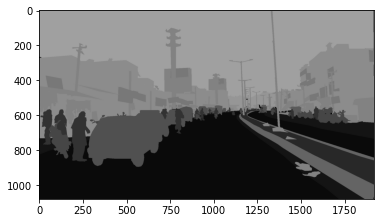

In [ ]:
import urllib.request
def grader_3():
    url = "https://i.imgur.com/4XSUlHk.png"
    url_response = urllib.request.urlopen(url)
    img_array = np.array(bytearray(url_response.read()), dtype=np.uint8)
    img = cv2.imdecode(img_array, -1)
    my_img = cv2.imread('/content/data/output/201/frame0029_gtFine_polygons.png')    
    plt.imshow(my_img)
    print((my_img[:,:,0]==img).all())
    print(np.unique(img))
    print(np.unique(my_img[:,:,0]))
    data_df.to_csv('preprocessed_data.csv', index=False)
grader_3()

In [ ]:
import tensorflow as tf
# tf.enable_eager_execution()
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
# from hilbert import hilbertCurve
import imgaug.augmenters as iaa
import numpy as np
# import albumentations as A
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [ ]:
aug2 = iaa.Fliplr(1)
aug3 = iaa.Flipud(1)
aug4 = iaa.Emboss(alpha=(1), strength=1)
aug5 = iaa.DirectedEdgeDetect(alpha=(0.8), direction=(1.0))
aug6 = iaa.Sharpen(alpha=(1.0), lightness=(1.5))

In [ ]:
file_names = data_df
file_names = file_names.drop(['json'],axis =1)
file_names = file_names.drop(['label'],axis =1)
file_names.head(2)


,image,mask
0,/content/data/images/201/frame0029_leftImg8bit...,/content/data/output/201/frame0029_gtFine_poly...
1,/content/data/images/201/frame0299_leftImg8bit...,/content/data/output/201/frame0299_gtFine_poly...


In [ ]:
CLASSES = {'road':10, 'parking':20, 'drivable fallback':20,'sidewalk':30,'non-drivable fallback':40,'rail track':40,
                    'person':50, 'animal':50, 'rider':60, 'motorcycle':70, 'bicycle':70, 'autorickshaw':80,
                    'car':80, 'truck':90, 'bus':90, 'vehicle fallback':90, 'trailer':90, 'caravan':90,
                    'curb':100, 'wall':100, 'fence':110,'guard rail':110, 'billboard':120,'traffic sign':120,
                    'traffic light':120, 'pole':130, 'polegroup':130, 'obs-str-bar-fallback':130,'building':140,
                    'bridge':140,'tunnel':140, 'vegetation':150, 'sky':160, 'fallback background':160,'unlabeled':0,
                    'out of roi':0, 'ego vehicle':170, 'ground':180,'rectification border':190,
                'train':200}
label = data_df['label'].values
classes=[]
for ls in label:
  cls=[]
  for l in ls:
    cls.append(CLASSES[l])
  classes.append(cls)

In [ ]:
def visualize(**images):
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        if i==1:
            plt.imshow(image, cmap='gray', vmax=1, vmin=0)
        else:
            plt.imshow(image)
    plt.show()
    
def normalize_image(mask):
    mask = (mask)/255
    return mask

class Dataset:

  
    CLASSES = {'road':10, 'parking':20, 'drivable fallback':20,'sidewalk':30,'non-drivable fallback':40,'rail track':40,
                    'person':50, 'animal':50, 'rider':60, 'motorcycle':70, 'bicycle':70, 'autorickshaw':80,
                    'car':80, 'truck':90, 'bus':90, 'vehicle fallback':90, 'trailer':90, 'caravan':90,
                    'curb':100, 'wall':100, 'fence':110,'guard rail':110, 'billboard':120,'traffic sign':120,
                    'traffic light':120, 'pole':130, 'polegroup':130, 'obs-str-bar-fallback':130,'building':140,
                    'bridge':140,'tunnel':140, 'vegetation':150, 'sky':160, 'fallback background':160,'unlabeled':0,
                    'out of roi':0, 'ego vehicle':170, 'ground':180,'rectification border':190,
                'train':200}

    def __init__(self, images_dir, file_names,classes):

        
        self.ids = file_names
        # the paths of images
        self.images_fps   = [os.path.join(image_id) for image_id in self.ids['image']]
        # the paths of segmentation images
        self.masks_fps    = [os.path.join(image_id) for image_id in self.ids['mask']]
        # giving labels for each class
        self.class_values = [self.CLASSES[cls] for cls in classes]
    
    def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i], cv2.IMREAD_UNCHANGED)
        mask  = cv2.imread(self.masks_fps[i], cv2.IMREAD_UNCHANGED)

        image = cv2.resize(image,(256,256) , cv2.INTER_NEAREST)
        mask = cv2.resize(mask,(256,256), cv2.INTER_NEAREST)

        #image_mask = normalize_image(mask)
       
        image_masks = [(mask == v) for v in self.class_values]
        image_mask = np.stack(image_masks, axis=-1).astype('float')
   
        a = np.random.uniform()
        if a<1:
            image = aug2.augment_image(image)
            image_mask = aug2.augment_image(image_mask)
        elif a<0.4:
            image = aug3.augment_image(image)
            image_mask = aug3.augment_image(image_mask)
        elif a<0.6:
            image = aug4.augment_image(image)
            image_mask = aug4.augment_image(image_mask)
        elif a<0.8:
            image = aug5.augment_image(image)
            image_mask = image_mask
        else:
            image = aug6.augment_image(image)
            image_mask = aug6.augment_image(image_mask)
            
    
        return image, image_mask
        
    def __len__(self):
        return len(self.ids)
    

In [ ]:
class Dataloder(tf.keras.utils.Sequence):    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]

        
        return tuple(batch)
    
    def __len__(self):
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

In [ ]:
mask_file = data_df['mask'].values
image_file = data_df['image'].values
#classes = data_df['label'].values
#filename = np.concatenate([np.reshape(image_file,newshape=(-1,1)),np.reshape(mask_file,newshape=(-1,1))],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test= train_test_split(file_names, test_size=0.33, random_state=42)

In [ ]:
classes=['road','parking', 'sidewalk','non-drivable fallback',
                    'person', 'rider', 'bicycle','car', 'vehicle fallback',
                    'curb', 'guard rail', 'traffic sign',
                    'obs-str-bar-fallback','building',
                     'vegetation','fallback background','unlabeled',
                     'ego vehicle', 'ground','rectification border','train']
train_dataset = Dataset(dir_path,X_train, classes=classes)
train_dataloader = Dataloder(train_dataset, batch_size=16, shuffle=True)
BATCH_SIZE=16
print(train_dataloader[0][1].shape)
#assert (train_dataloader[0][0].shape) == (BATCH_SIZE, 512, 512, 3)

(16, 256, 256, 21)


In [ ]:
train_dataset = Dataset(dir_path,X_train, classes=classes)
train_dataloader = Dataloder(train_dataset, batch_size=16, shuffle=True)
BATCH_SIZE=16
print(train_dataloader[0][1].shape)

(16, 256, 256, 21)


In [ ]:
test_dataset = Dataset(dir_path,X_test, classes=classes)
test_dataloader = Dataloder(test_dataset, batch_size=16, shuffle=True)
BATCH_SIZE=16
print(train_dataloader[0][1].shape)

(16, 256, 256, 21)


The Dice coefficient is widely used metric in computer vision community to calculate the similarity between two images,it has also been adapted as loss function known as Dice Loss.

Loss(y, p) = 1 − (2yp+ 1)/(y + p + 1)

Here, 1 is added in numerator and denominator to ensure that
the function is not undefined in edge case scenarios such as
when y = p = 0

Range of this loss is 0-1 . 

Dice coefficient  is a measure of overlap between two sets.If two sets A and B overlap perfectly, it gets maximum value to 1. Otherwise, DSC starts to decrease, getting to its minimum value to 0 if the two sets don‘t overlap at all. Therefore, the range of DSC is between 0 and 1, the larger the better. Thus we can use 1-DSC as Dice loss to maximize the overlap between two sets.

## **UNET**

In [ ]:
pip install git+https://github.com/qubvel/segmentation_models

In [ ]:
# we are importing the pretrained unet from the segmentation models
# https://github.com/qubvel/segmentation_models
import segmentation_models as sm
from segmentation_models import Unet
# sm.set_framework('tf.keras')
tf.keras.backend.set_image_data_format('channels_last')
import segmentation_models as sm

sm.set_framework('tf.keras')

sm.framework()

Segmentation Models: using `keras` framework.


'tf.keras'

In [ ]:
# loading the unet model and using the resnet 34 and initilized weights with imagenet weights
# "classes" :different types of classes in the dataset
model = Unet('resnet34', encoder_weights='imagenet', classes=21, encoder_freeze= True,activation='softmax', input_shape=(256,256,3))

In [ ]:
# https://github.com/qubvel/segmentation_models
import segmentation_models as sm
from segmentation_models.metrics import iou_score
from segmentation_models import Unet

optim = tf.keras.optimizers.Adam(0.001)

focal_loss = sm.losses.cce_dice_loss

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss 
# or total_loss = sm.losses.categorical_focal_dice_loss 

model.compile(optim, focal_loss, metrics=[iou_score])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.callbacks import Callback
from keras import backend as K


callbacks = [
    tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Assignment/Segmentation/Save Model/best_model_L.h5', save_weights_only=True, save_best_only=True, \
                                       mode='min', monitor='val_iou_score'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_iou_score', min_lr=0.000001,patience=2),
]

In [ ]:
history = model.fit_generator(train_dataloader, validation_data=test_dataloader,steps_per_epoch=len(train_dataloader), epochs=5 , callbacks=callbacks,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/5
167/167 [==============================] - 278s 2s/step - loss: 0.2818 - iou_score: 0.6475 - val_loss: 0.3621 - val_iou_score: 0.5730 - lr: 1.0000e-04
Epoch 2/5
167/167 [==============================] - 279s 2s/step - loss: 0.2756 - iou_score: 0.6538 - val_loss: 0.3616 - val_iou_score: 0.5735 - lr: 1.0000e-04
Epoch 3/5
167/167 [==============================] - 279s 2s/step - loss: 0.2717 - iou_score: 0.6579 - val_loss: 0.3615 - val_iou_score: 0.5739 - lr: 1.0000e-04
Epoch 4/5
167/167 [==============================] - 279s 2s/step - loss: 0.2679 - iou_score: 0.6618 - val_loss: 0.3609 - val_iou_score: 0.5745 - lr: 1.0000e-05
Epoch 5/5
167/167 [==============================] - 279s 2s/step - loss: 0.2674 - iou_score: 0.6623 - val_loss: 0.3609 - val_iou_score: 0.5745 - lr: 1.0000e-05


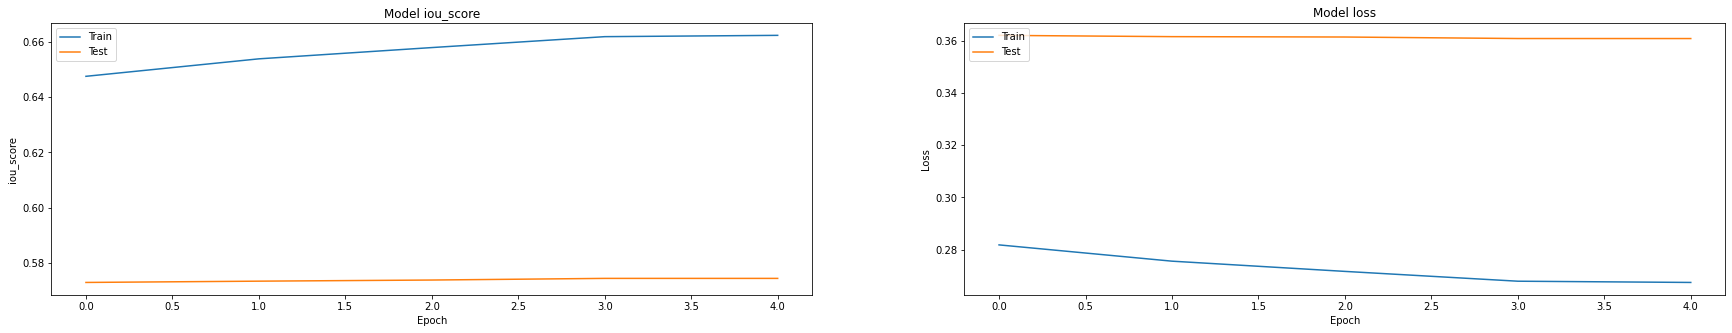

In [ ]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

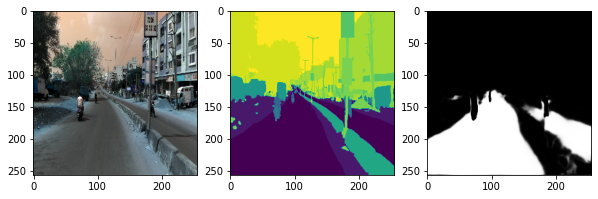

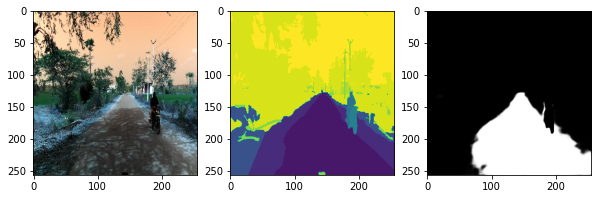

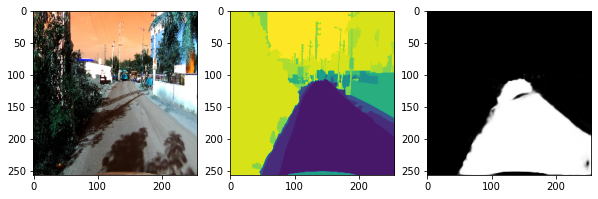

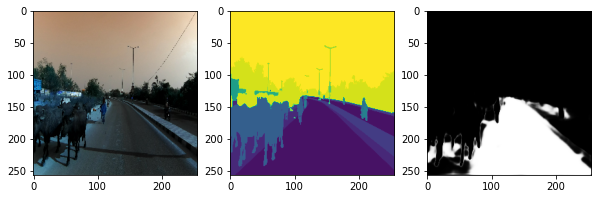

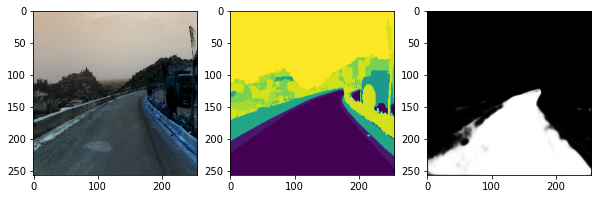

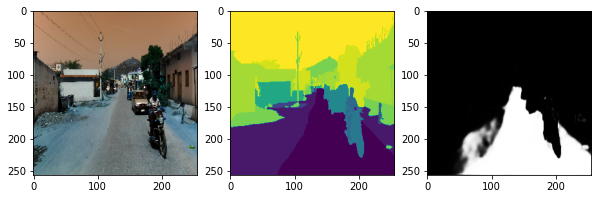

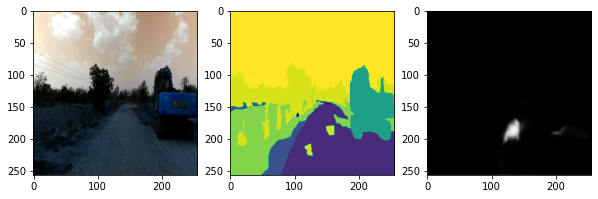

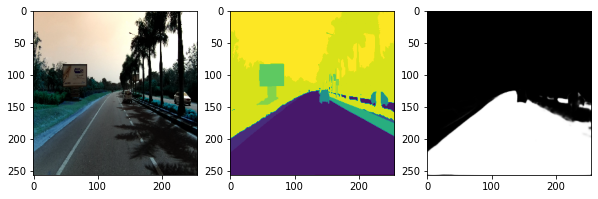

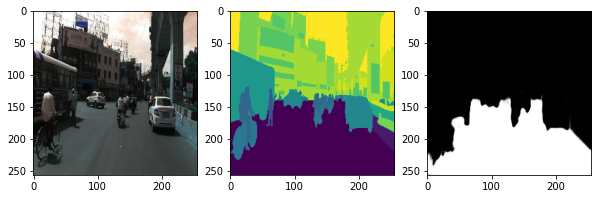

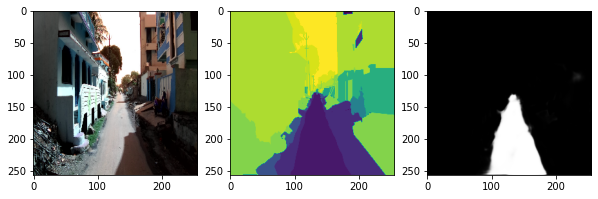

In [ ]:
dir_path = '/content/data/'
for p, i in enumerate(X_test[0:10].values):
    #print('i',i)
    #original image
    image = cv2.imread(os.path.join(i[0]), cv2.IMREAD_UNCHANGED)
    image = cv2.resize(image, (256,256)) 
    
    #predicted segmentation map
    predicted  = model.predict(image[np.newaxis,:,:,:])
    
    #original segmentation map
    image_mask = cv2.imread(os.path.join(i[1]), cv2.IMREAD_UNCHANGED)
    image_mask = cv2.resize(image_mask, (256,256))
    

    plt.figure(figsize=(10,6))
    plt.subplot(131)
    plt.imshow(image)
    plt.subplot(132)
    plt.imshow(image_mask)
    plt.subplot(133)
    plt.imshow(predicted[0,:,:,0], cmap='gray', vmax=1, vmin=0)
    plt.show()

## **CA NET**

In [ ]:
import tensorflow as tf
# tf.compat.v1.enable_eager_execution()
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Multiply
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import glorot_uniform
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:414: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
class convolutional_block(tf.keras.layers.Layer):
    def __init__(self, kernel=3, filters=[4,4,8],stride=1, name="conv block"):
        super().__init__()
        self.F1, self.F2, self.F3 = filters
        self.kernel = kernel
        self.stride = stride        
        self.conv_1 = Conv2D(self.F1,(1,1),strides=(self.stride,self.stride),padding='same')
        self.conv_2 = Conv2D(self.F2,(self.kernel,self.kernel),strides=(1,1),padding='same')
        self.conv_3 = Conv2D(self.F3,(1,1),strides=(1,1),padding='same')
        self.conv_4 = Conv2D(self.F3,(self.kernel,self.kernel),strides=(self.stride,self.stride),padding='same')        
        self.bn1 = BatchNormalization(axis=3)
        self.bn2 = BatchNormalization(axis=3)
        self.bn3 = BatchNormalization(axis=3)
        self.bn4 = BatchNormalization(axis=3)        
        self.activation = Activation("relu")        
        self.add = Add()        
    def call(self, X):        
        X_input = X
        conv1 = self.conv_1(X)
        bn1 = self.bn1(conv1)
        act1 = self.activation(bn1)

        conv2 = self.conv_2(act1)
        bn2 = self.bn2(conv2)
        act2 = self.activation(bn2)
        
        conv3 = self.conv_3(act2)
        bn3 = self.bn3(conv3)
        
        X_input = self.conv_4(X_input)
        X_input = self.bn4(X_input)
        X_input = self.activation(X_input)
        
        X = self.add([bn3, X_input])
        X = self.activation(X)
        
        return X

In [ ]:
class identity_block(tf.keras.layers.Layer):
    def __init__(self, kernel=3,  filters=[4,4,8], name="identity block"):
        super().__init__()
        self.F1, self.F2, self.F3 = filters
        self.kernel = kernel
        
        self.conv_1 = Conv2D(self.F1, (1,1), (1,1), padding="same")
        self.conv_2 = Conv2D(self.F2, (self.kernel,self.kernel), (1,1), padding="same")
        self.conv_3 = Conv2D(self.F3, (1,1), (1,1), padding="same")
        
        self.bn1 = BatchNormalization(axis=3)
        self.bn2 = BatchNormalization(axis=3)
        self.bn3 = BatchNormalization(axis=3)
        
        self.activation = Activation("relu")
        
        self.add = Add()
        
        
    def call(self, X):
        # write the architecutre that was mentioned above
        
        X_input = X
        
        conv1 = self.conv_1(X)
        bn1 = self.bn1(conv1)
        act1 = self.activation(bn1)
        
        conv2 = self.conv_2(act1)
        bn2 = self.bn2(conv2)
        act2 = self.activation(bn2)
        
        conv3 = self.conv_3(act2)
        bn3 = self.bn3(conv3)
        
        X = self.add([bn3, X_input])
        X = self.activation(X)
        
        
        return X

In [ ]:
X_input = Input(shape=(256,256,3))

X = Conv2D(64, (3, 3), name='conv1', padding="same", kernel_initializer=glorot_uniform(seed=0))(X_input)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)
print(X.shape)

# First Convolutional Block

c1 = convolutional_block(kernel=3,  filters=[4,4,8], stride=2)(X)
print("C1 Shape = ", c1.shape)

I11 = identity_block()(c1)
print("I11 Shape = ", I11.shape)

# Second Convolutional Block

c2 = convolutional_block(kernel=3,  filters=[8,8,16], stride=2)(I11)
print("C2 Shape = ", c2.shape)

I21 = identity_block(kernel=3,  filters=[8,8,16])(c2)
print("I21 Shape = ", I21.shape)

I22 = identity_block(kernel=3,  filters=[8,8,16])(I21)
print("I22 Shape = ", I22.shape)

# Third Convolutional Block

c3 = convolutional_block(kernel=3,  filters=[16,16,32], stride=1)(I22)
print("C3 Shape = ", c3.shape)

I31 = identity_block(kernel=3,  filters=[16,16,32])(c3)
print("I31 Shape = ", I31.shape)

I32 = identity_block(kernel=3,  filters=[16,16,32])(I31)
print("I32 Shape = ", I32.shape)

I33 = identity_block(kernel=3,  filters=[16,16,32])(I32)
print("I33 Shape = ", I33.shape)

# Fourth Convolutional Block

c4 = convolutional_block(kernel=3,  filters=[32,32,64], stride=1)(I33)
print("C3 Shape = ", c4.shape)

I41 = identity_block(kernel=3,  filters=[32,32,64])(c4)
print("I41 Shape = ", I41.shape)

I42 = identity_block(kernel=3,  filters=[32,32,64])(I41)
print("I42 Shape = ", I42.shape)

I43 = identity_block(kernel=3,  filters=[32,32,64])(I42)
print("I43 Shape = ", I43.shape)

I44 = identity_block(kernel=3,  filters=[32,32,64])(I42)
print("I44 Shape = ", I44.shape)

(None, 128, 128, 64)
C1 Shape =  (None, 64, 64, 8)
I11 Shape =  (None, 64, 64, 8)
C2 Shape =  (None, 32, 32, 16)
I21 Shape =  (None, 32, 32, 16)
I22 Shape =  (None, 32, 32, 16)
C3 Shape =  (None, 32, 32, 32)
I31 Shape =  (None, 32, 32, 32)
I32 Shape =  (None, 32, 32, 32)
I33 Shape =  (None, 32, 32, 32)
C3 Shape =  (None, 32, 32, 64)
I41 Shape =  (None, 32, 32, 64)
I42 Shape =  (None, 32, 32, 64)
I43 Shape =  (None, 32, 32, 64)
I44 Shape =  (None, 32, 32, 64)


In [ ]:
class global_flow(tf.keras.layers.Layer):
    def __init__(self, input_dim, output_dim, channels, name="global_flow"):
        super().__init__()
        
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.channels = channels
        
        self.conv1 = Conv2D(64,kernel_size=(1,1),strides=(1,1),padding='same')
        self.global_avg_pool = GlobalAveragePooling2D()
        self.bn = BatchNormalization(axis=3)
        self.activation = Activation("relu")
        self.upsample = UpSampling2D(size=(self.input_dim,self.output_dim),interpolation='bilinear')
        
    def call(self, X):
        
        global_avg = self.global_avg_pool(X)
        
        global_avg= tf.expand_dims(global_avg, 1)
        global_avg = tf.expand_dims(global_avg, 1)
        
        bn1 = self.bn(global_avg)
        act1 = self.activation(bn1)
        
        conv1 = self.conv1(act1)
        
        X = self.upsample(conv1)
        
        return X

In [ ]:
class context_flow(tf.keras.layers.Layer):    
    def __init__(self, name="context_flow"):
        super().__init__()
        
        self.conv_1 = Conv2D(64, kernel_size=(3,3), strides=(1,1), padding="same")
        self.conv_2 = Conv2D(64, kernel_size=(3,3), strides=(1,1), padding="same")
        self.conv_3 = Conv2D(64, kernel_size=(1,1), strides=(1,1), padding="same")
        self.conv_4 = Conv2D(64, kernel_size=(1,1), strides=(1,1), padding="same")
        
        self.concatenate = Concatenate()
        
        self.avg_pool = AveragePooling2D(pool_size=(2,2))
        
        self.activation_relu = Activation("relu")
        self.activation_sigmoid = Activation("sigmoid")
        
        self.add = Add()
        self.multiply = Multiply()
        
        self.upsample = UpSampling2D(size=(2,2),interpolation='bilinear') 
        
        
    def call(self, X):        
        
        INP, FLOW = X[0], X[1] 
        
        concat = self.concatenate([INP, FLOW])
        avg_pooling = self.avg_pool(concat)
        conv1 = self.conv_1(avg_pooling)
        conv2 = self.conv_2(conv1)
        
        
        conv3 = self.conv_3(conv2)
        act1 = self.activation_relu(conv3)
        conv4 = self.conv_4(act1)
        act2 = self.activation_sigmoid(conv4)
        
        
        multi = self.multiply([conv2, act2])
        add = self.add([conv2, multi])
        X = self.upsample(add)
        
        return X

In [ ]:
class fsm(tf.keras.layers.Layer):
    def __init__(self, name="feature_selection"):
        super().__init__()
        
        self.conv_1 = Conv2D(32, (3,3), (1,1), padding="same")
        self.global_avg_pool = GlobalAveragePooling2D()
        self.conv_2 = Conv2D(32 ,kernel_size=(1,1),padding='same')
        self.bn = BatchNormalization()
        self.act_sigmoid = Activation('sigmoid')
        self.multiply = Multiply()
        self.upsample = UpSampling2D(size=(2,2),interpolation='bilinear')
        
    def call(self, X):
        
        X = self.conv_1(X)
        global_avg = self.global_avg_pool(X)
        global_avg= tf.expand_dims(global_avg, 1)
        global_avg = tf.expand_dims(global_avg, 1)
        conv1= self.conv_2(global_avg)
        bn1= self.bn(conv1)
        Y = self.act_sigmoid(bn1)
        output = self.multiply([X, Y])
        FSM_Conv_T = self.upsample(output)
        
        return FSM_Conv_T

In [ ]:
class agcn(tf.keras.layers.Layer):    
    def __init__(self):
        super().__init__()
        self.conv_1  = Conv2D(32,kernel_size=(1,7),padding='same')
        self.conv_2  = Conv2D(32,kernel_size=(7,1),padding='same')
        self.conv_3  = Conv2D(32,kernel_size=(1,7),padding='same')
        self.conv_4  = Conv2D(32,kernel_size=(7,1),padding='same')
        self.conv_5  = Conv2D(32,kernel_size=(3,3),padding='same')
        self.add = Add()
        
    def call(self, X):
        # please implement the above mentioned architecture
        conv1 = self.conv_1(X)
        conv2= self.conv_2(conv1)
        
        # side path
        conv3 = self.conv_4(X)
        conv4 = self.conv_3(conv3)
        
        add1 = self.add([conv2,conv4])
        
        conv5 = self.conv_5(add1)
        
        X = self.add([conv5,add1])
        
        return X

In [ ]:
X_input = Input(shape=(256,256,3))

# Stage 1
X = Conv2D(64, (3, 3), name='conv1', padding="same", kernel_initializer=glorot_uniform(seed=0))(X_input)
X = BatchNormalization(axis=3, name='bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((2, 2), strides=(2, 2))(X)
print(X.shape)

# First Convolutional Block

c1 = convolutional_block(kernel=3,  filters=[4,4,8], stride=2)(X)
print("C1 Shape = ", c1.shape)

I11 = identity_block()(c1)
print("I11 Shape = ", I11.shape)

# Second Convolutional Block

c2 = convolutional_block(kernel=3,  filters=[8,8,16], stride=2)(I11)
print("C2 Shape = ", c2.shape)

I21 = identity_block(kernel=3,  filters=[8,8,16])(c2)
print("I21 Shape = ", I21.shape)

I22 = identity_block(kernel=3,  filters=[8,8,16])(I21)
print("I22 Shape = ", I22.shape)

# Third Convolutional Block

c3 = convolutional_block(kernel=3,  filters=[16,16,32], stride=1)(I22)
print("C3 Shape = ", c3.shape)

I31 = identity_block(kernel=3,  filters=[16,16,32])(c3)
print("I31 Shape = ", I31.shape)

I32 = identity_block(kernel=3,  filters=[16,16,32])(I31)
print("I32 Shape = ", I32.shape)

I33 = identity_block(kernel=3,  filters=[16,16,32])(I32)
print("I33 Shape = ", I33.shape)

# Fourth Convolutional Block

c4 = convolutional_block(kernel=3,  filters=[32,32,64], stride=1)(I33)
print("C3 Shape = ", c4.shape)

I41 = identity_block(kernel=3,  filters=[32,32,64])(c4)
print("I41 Shape = ", I41.shape)

I42 = identity_block(kernel=3,  filters=[32,32,64])(I41)
print("I42 Shape = ", I42.shape)

I43 = identity_block(kernel=3,  filters=[32,32,64])(I42)
print("I43 Shape = ", I43.shape)

I44 = identity_block(kernel=3,  filters=[32,32,64])(I42)
print("I44 Shape = ", I44.shape)

# Global Flow

input_dim = I44.shape[1]
output_dim = I44.shape[2]
channels = I44.shape[-1]

GF1 = global_flow(input_dim, output_dim, channels)(I44)
print("Global Flow Shape = ", GF1.shape)

# Context Flow 1 

Y = [I44, GF1]
CF1 = context_flow()(Y)
print("CF1 shape = ", CF1.shape)

# Context Flow 2

Z = [I44, CF1]
CF2 = context_flow()(Y)
print("CF2 shape = ", CF2.shape)

# Context Flow 3

W = [I44, CF1]
CF3 = context_flow()(W)
print("CF3 shape = ", CF3.shape)

# FSM Module 

out = Add()([GF1, CF1, CF2, CF3])
print("Sum of Everything = ", out.shape)
fsm1 = fsm()(out)
print("Shape of FSM = ", fsm1.shape)

# AGCN Module

agcn1 = agcn()(c1)
print("Shape of AGCN = ", agcn1.shape)

# Concatinating FSM and AGCN

concat = Concatenate()([fsm1, agcn1])
print("Concatinated Shape = ", concat.shape)

# Final Convolutional Block

final_conv = Conv2D(filters=21, kernel_size=(1,1), strides=(1,1), padding="same")(concat)
print("Final Convolution Shape = ", final_conv.shape)

# Upsample

up_samp = UpSampling2D((4,4), interpolation="bilinear")(final_conv)
print("Final Shape = ", up_samp.shape)

# Activation

output = Activation("softmax")(up_samp)
print("Final Shape = ", output.shape)

(None, 128, 128, 64)
C1 Shape =  (None, 64, 64, 8)
I11 Shape =  (None, 64, 64, 8)
C2 Shape =  (None, 32, 32, 16)
I21 Shape =  (None, 32, 32, 16)
I22 Shape =  (None, 32, 32, 16)
C3 Shape =  (None, 32, 32, 32)
I31 Shape =  (None, 32, 32, 32)
I32 Shape =  (None, 32, 32, 32)
I33 Shape =  (None, 32, 32, 32)
C3 Shape =  (None, 32, 32, 64)
I41 Shape =  (None, 32, 32, 64)
I42 Shape =  (None, 32, 32, 64)
I43 Shape =  (None, 32, 32, 64)
I44 Shape =  (None, 32, 32, 64)
Global Flow Shape =  (None, 32, 32, 64)
CF1 shape =  (None, 32, 32, 64)
CF2 shape =  (None, 32, 32, 64)
CF3 shape =  (None, 32, 32, 64)
Sum of Everything =  (None, 32, 32, 64)
Shape of FSM =  (None, 64, 64, 32)
Shape of AGCN =  (None, 64, 64, 32)
Concatinated Shape =  (None, 64, 64, 64)
Final Convolution Shape =  (None, 64, 64, 21)
Final Shape =  (None, 256, 256, 21)
Final Shape =  (None, 256, 256, 21)


In [ ]:
from keras.callbacks import ModelCheckpoint
import datetime
filepath = '/content/drive/MyDrive/Assignment/Segmentation/Save Model/best_model_L.h5'
checkpoint = ModelCheckpoint(filepath = filepath, monitor ='val_iou_score' ,mode='auto', save_best_only = True , verbose=2) 


In [ ]:
model = Model(inputs = X_input, outputs = output)

import segmentation_models as sm
from segmentation_models.metrics import iou_score

optim = tf.keras.optimizers.Adam(0.001)

focal_loss = sm.losses.cce_dice_loss

model.compile(optim, focal_loss, metrics=[iou_score])

history = model.fit(train_dataloader,steps_per_epoch=5, validation_data=test_dataloader,epochs=1)

5/5 [==============================] - 96s 22s/step - loss: 0.4862 - iou_score: 0.4747 - val_loss: 0.5923 - val_iou_score: 0.4059


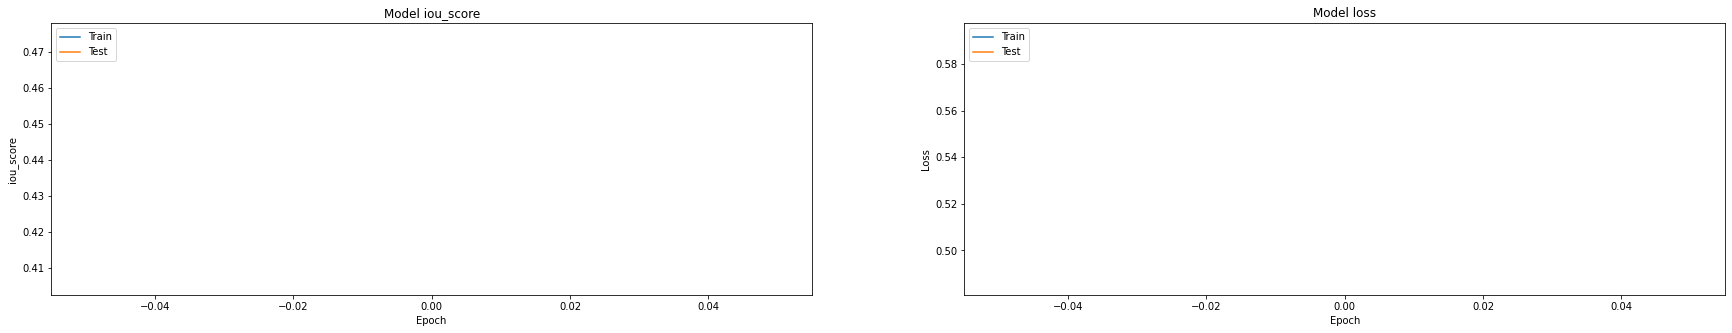

In [ ]:
# Plot training & validation iou_score values
plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.title('Model iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

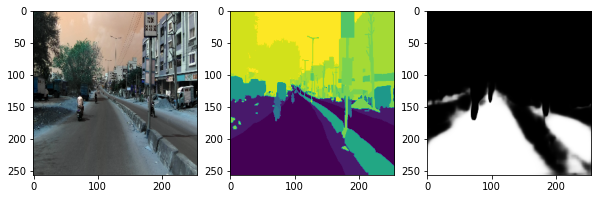

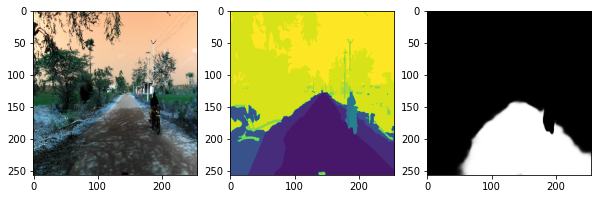

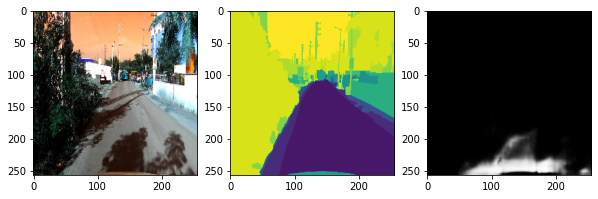

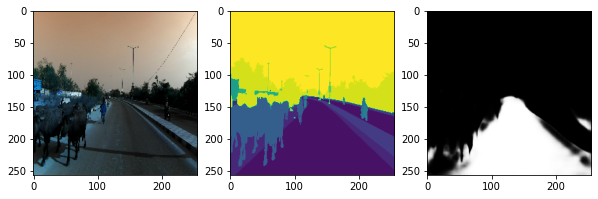

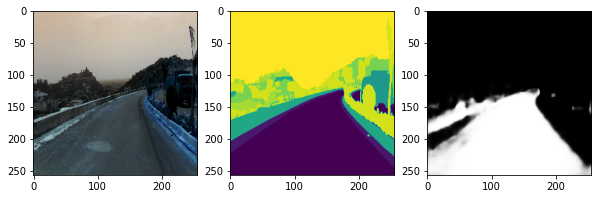

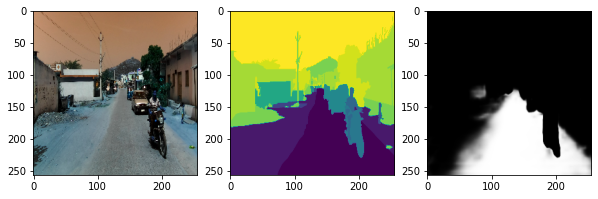

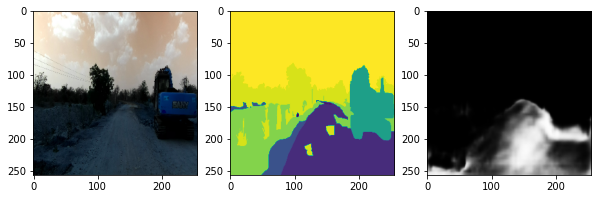

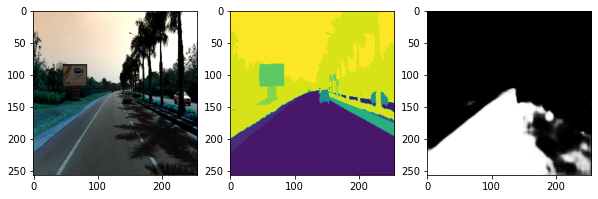

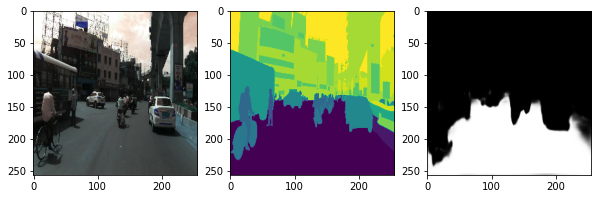

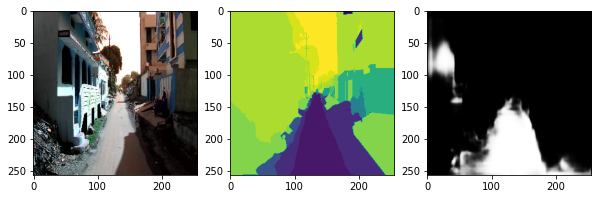

In [ ]:
dir_path = '/content/data/'
for p, i in enumerate(X_test[0:10].values):
    #print('i',i)
    #original image
    image = cv2.imread(os.path.join(i[0]), cv2.IMREAD_UNCHANGED)
    image = cv2.resize(image, (256,256)) 
    
    #predicted segmentation map
    predicted  = model.predict(image[np.newaxis,:,:,:])
    
    #original segmentation map
    image_mask = cv2.imread(os.path.join(i[1]), cv2.IMREAD_UNCHANGED)
    image_mask = cv2.resize(image_mask, (256,256))
    

    plt.figure(figsize=(10,6))
    plt.subplot(131)
    plt.imshow(image)
    plt.subplot(132)
    plt.imshow(image_mask)
    plt.subplot(133)
    plt.imshow(predicted[0,:,:,0], cmap='gray', vmax=1, vmin=0)
    plt.show()